#Homework 4

Due by next class to be submitted on Blackboard.
1. With an image of your choosing, write a script to shift a grayscale image 10 pixels to the right.
2. Write a script that will rotate the color image of the bird 45° counter clockwise with no reshaping. What is the shape of the new image?
3. Repeat the processing in #2. This time with reshaping. What is the shape of the resulting image? Why is there a difference?
4. Using the alien image from the binary dialation example, perform a binary erosion. Use the same iterations as done earlier to create big and cmg. Create a new image, dmg, based on adding the original image with bmg and subtracting cmg. Subtract the original image from dmg.
Show all resulting images.
5. Using the clock image and code for the polar, irpolar and log polar plots, shift the center of rotation to (200, 200). Describe your interpretation of the results. Describe what happends if we shift the center of rotation to (400,400).
6. Create an image with an affine transformation of 45 degrees and 90 degrees. Explain the 90 degree result.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np
import scipy.ndimage as nd

In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

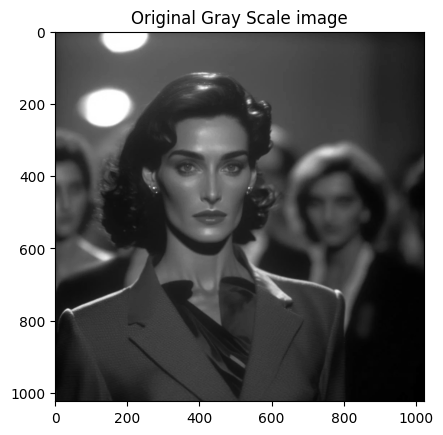

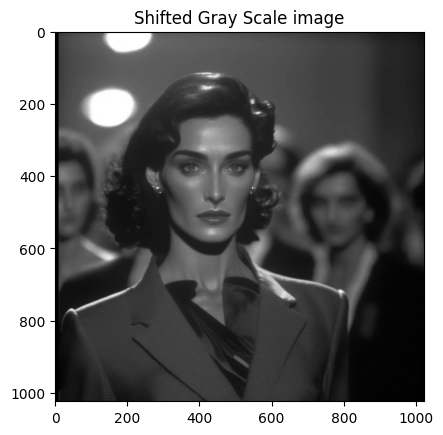

In [3]:
#Q1 With an image of your choosing, write a script to shift a grayscale image 10 pixels to the right.

url = 'https://raw.githubusercontent.com/ewu22gmu/Test_Photo1_CDS468/refs/heads/main/yasmeen-ghauri-for-yves-saint-laurent-v0-4s2ytbvcae3a1.jpg.webp'
adata = imageio.imread(url, mode='F')

plt.title('Original Gray Scale image')
plt.imshow(adata, cmap='gray')
plt.show()

#Shift image 10 pixels to the right
bdata = nd.shift(adata, (0,10))

plt.title('Shifted Gray Scale image')
plt.imshow(bdata, cmap='gray')
plt.show()

<ipython-input-26-faed4658dc10>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imageio.imread(url)


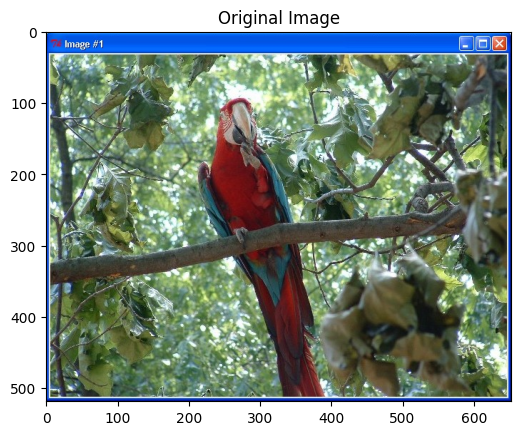

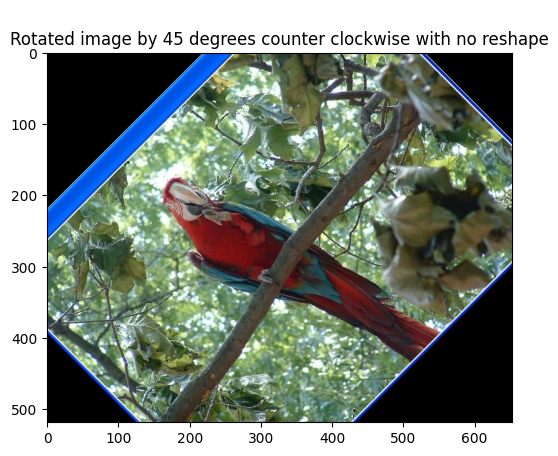

(519, 653, 3)


In [ ]:
#Q2 Write a script that will rotate the color image of the bird 45° counter clockwise with no reshaping. What is the shape of the new image?
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
data = imageio.imread(url)

plt.title('Original Image')
plt.imshow(data)
plt.show()

#Rotate the bird
data2 = nd.rotate(data, 45, reshape=False)
plt.title('\nRotated image by 45 degrees counter clockwise with no reshape')
plt.imshow(data2)
plt.show()

print(data2.shape)

<ipython-input-25-c1db2a13914b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imageio.imread(url)


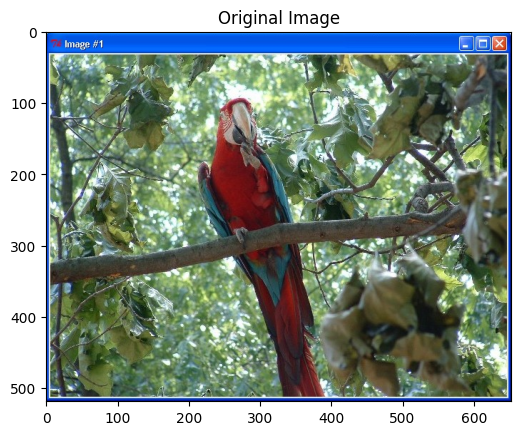

(829, 829, 3)


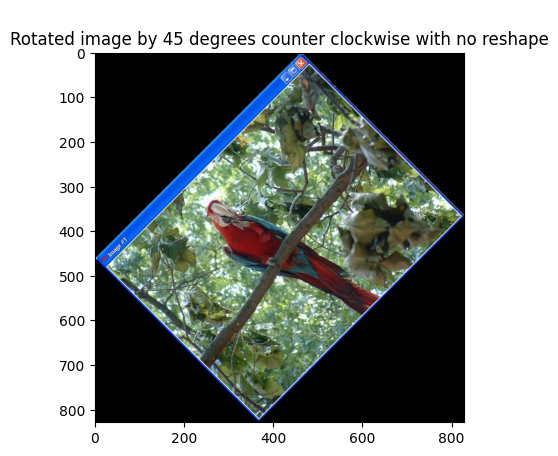

In [ ]:
#Q3 Repeat the processing in #2. This time with reshaping. What is the shape of the resulting image? Why is there a difference?
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
data = imageio.imread(url)

plt.title('Original Image')
plt.imshow(data)
plt.show()

#Rotate the bird
data2 = nd.rotate(data, 45, reshape=True)
plt.title('\nRotated image by 45 degrees counter clockwise with no reshape')
plt.imshow(data2)

print(data2.shape)

What is the shape of the resulting image? Why is there a difference?

The shape of the image resulting from Q3, with reshape=True is (829,829,3). There is a diffrence, becuase when reshape is false, then the frame of the image stays the same as the original image, leading to parts of the image being effectively "cut out." While, when reshape is true, the frame is reshaped to allow for the resulting rotated image to be displayed.

<ipython-input-31-6db2b50eecbb>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url,mode='F') < 100  #  set to 1 all of the pixels that originally have a value less than 100


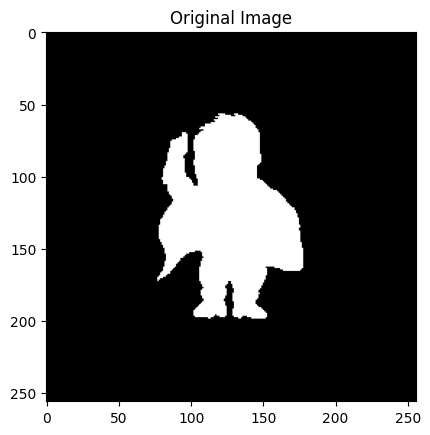

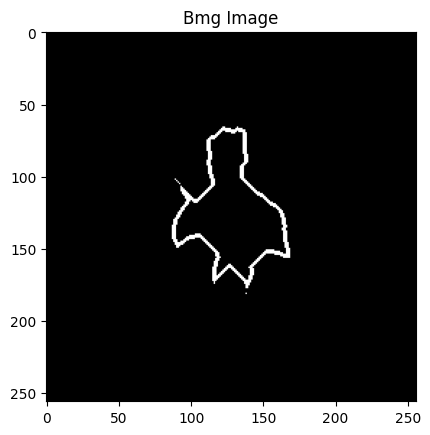

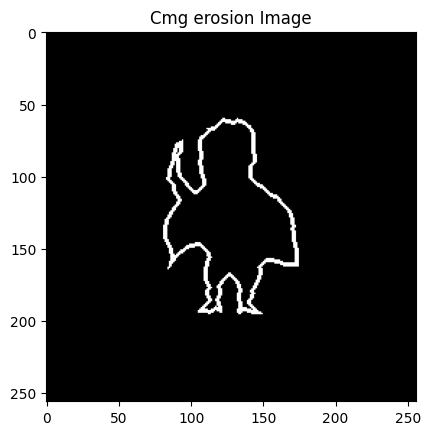

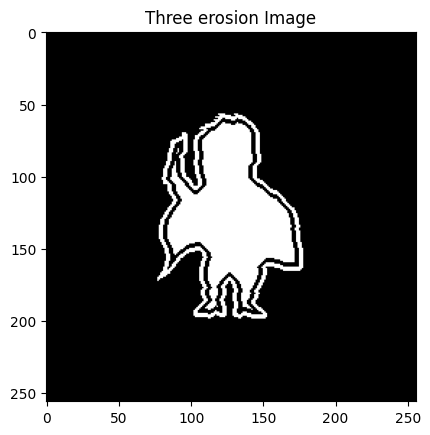

In [ ]:
#Q4
'''
Using the alien image from the binary dialation example, perform a binary erosion.
Use the same iterations as done earlier to create big and cmg.
Create a new image, dmg, based on adding the original image with bmg and subtracting cmg.
Subtract the original image from dmg. Show all resulting images.
'''

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/alien73.png'
amg = imageio.imread(url,mode='F') < 100  #  set to 1 all of the pixels that originally have a value less than 100

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

#Perform binary erosion
bmg = nd.binary_erosion(amg, iterations=12) ^ nd.binary_erosion(amg, iterations=9)
cmg = nd.binary_erosion(amg, iterations=6) ^ nd.binary_erosion(amg, iterations=3)

dmg = amg + bmg ^ cmg

plt.title('Bmg erosion Image')
plt.imshow(bmg, cmap='gray')
plt.show()

plt.title('Cmg erosion Image')
plt.imshow(cmg, cmap='gray')
plt.show()

plt.title('Three erosion Image')
plt.imshow(dmg, cmap='gray')
plt.show()

In [ ]:
# RPolar defined as follows
def RPolar(data, pxy):
    ndx = np.indices(data.shape)
    v,h = data.shape
    a = ndx[1].astype(float)
    a = a / h * 2 * np.pi
    y = ndx[0] * np.cos(a)
    x = ndx[0] * np.sin(a)
    ndx[0] = x.astype(int) + pxy[0]
    ndx[1] = y.astype(int) + pxy[1]
    answ = nd.map_coordinates(data, ndx)
    return answ

# IRPolar defined as follows
def IRPolar(rpdata, pxy):
    ndx = np.indices(rpdata.shape)
    ndx[0] -= pxy[0]
    ndx[1] -= pxy[1]
    v,h = rpdata.shape
    r = np.sqrt(ndx[0]**2 + ndx[1]**2)
    theta = np.arctan2(-ndx[0], -ndx[1] )/2/np.pi*h
    ndx[0] = r.astype(int)
    ndx[1] = theta.astype(int) + h/2
    answ = nd.map_coordinates(rpdata, ndx)
    answ[pxy[0],pxy[1]:] = answ[pxy[0]-1,pxy[1]:]
    return answ

# LogPolar defined as follows
def LogPolar(data, pxy):
    ndx = np.indices(data.shape)
    v,h = data.shape
    a = ndx[1].astype(float)
    a = a / h * 2 * np.pi
    r = np.exp( ndx[0]/v * np.log(v/2))-1.0
    y = r * np.cos(a)
    x = r * np.sin(a)
    ndx[0] = x.astype(int) + pxy[0]
    ndx[1] = y.astype(int) + pxy[1]
    answ = nd.map_coordinates(data, ndx)
    return answ

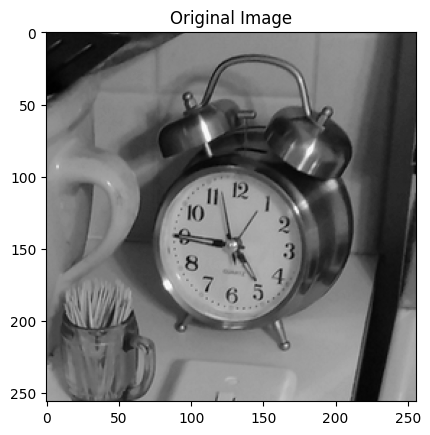

(256, 256)


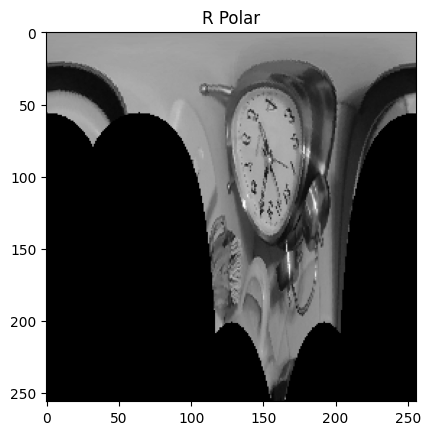

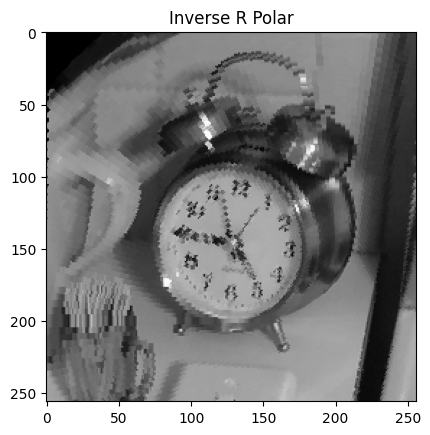

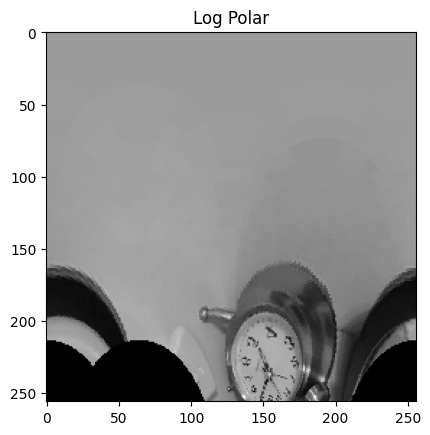

In [ ]:
#Q5
'''
Using the clock image and code for the polar, irpolar and log polar plots, shift the center of rotation to (200, 200).
Describe your interpretation of the results. Describe what happends if we shift the center of rotation to (400,400).
'''

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/clock.png'
adata = imageio.imread(url,mode='F')

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

print(adata.shape)

#Transforms around the (200,200)
RPimg = RPolar(adata, (200,200))
plt.title('R Polar')
plt.imshow(RPimg, cmap='gray')
plt.show()

IRPimg = IRPolar(RPimg, (200,200))
plt.title('Inverse R Polar')
plt.imshow(IRPimg, cmap='gray')
plt.show()

LPimg = LogPolar(adata, (200,200))
plt.title('Log Polar')
plt.imshow(LPimg, cmap='gray')
plt.show()

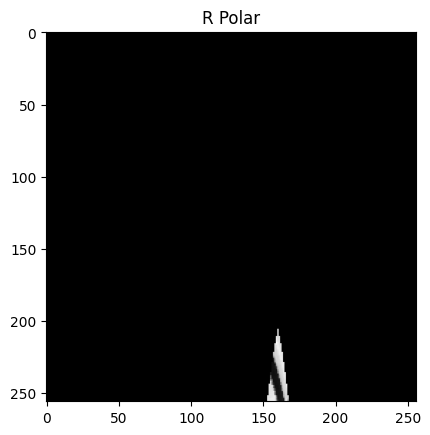

IndexError: index 399 is out of bounds for axis 0 with size 256

In [ ]:
#Transforms around the (400,400)
RPimg = RPolar(adata, (400,400))
plt.title('R Polar')
plt.imshow(RPimg, cmap='gray')
plt.show()

IRPimg = IRPolar(RPimg, (400,400))
plt.title('Inverse R Polar')
plt.imshow(IRPimg, cmap='gray')
plt.show()

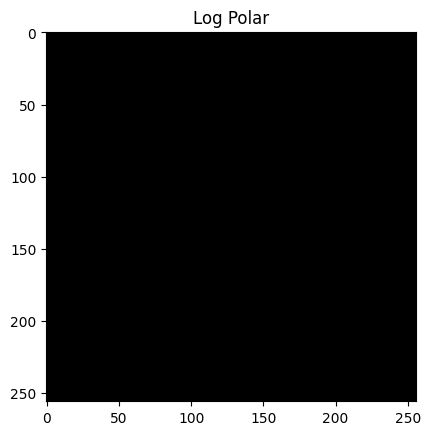

In [ ]:
LPimg = LogPolar(adata, (400,400))
plt.title('Log Polar')
plt.imshow(LPimg, cmap='gray')
plt.show()

Describe your interpretation of the results. Describe what happends if we shift the center of rotation to (400,400).

When the center of rotation is (200,200), the image is shifted around (200,200), which makes sense and the inverse rpolar is able to somewhat undo the transformation, albeit with quite a bit of artifacting. Now when the center of rotation is (400,400), which is a point outside of the original image's size of 256 by 256, the image is still seemingly able to be rotated about the point (400,400), but is unable to be inversed back to linear because of limitations of the function, where the resulting transform seems to be greater than the size of the original image. Curiosly for the log transform centered about (400,400), the image is completely black. It would seem to me that the rotated image would not fit on frame, as 400,400 is quite a bit away from the 256x256 sized frame.

In [ ]:
def AffineExample(data,deg):
    theta = deg * np.pi/180 # deg degrees in radians
    mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta/4), np.cos(theta)]])
    data2 = nd.affine_transform(data, mat)
    return data2

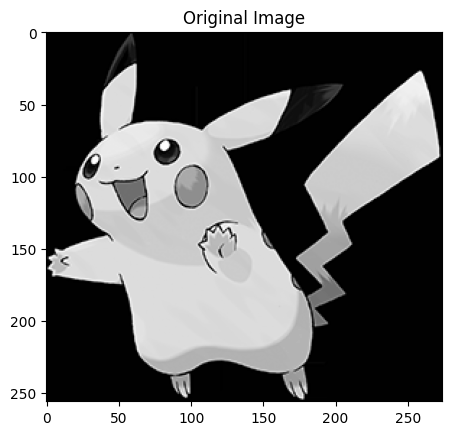

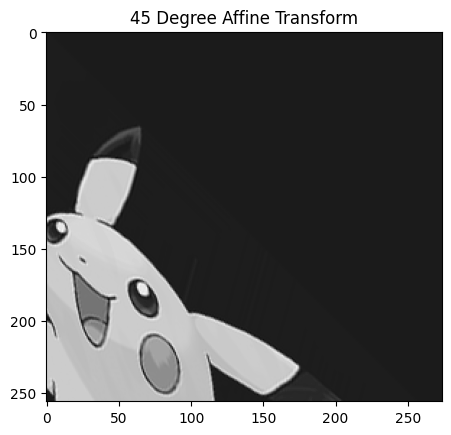

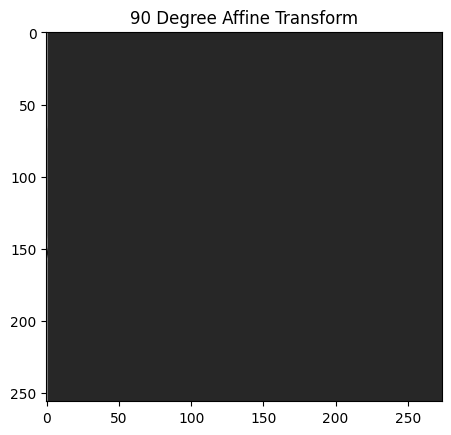

In [ ]:
#Q6 Create an image with an affine transformation of 45 degrees and 90 degrees. Explain the 90 degree result.

url = 'https://raw.githubusercontent.com/ewu22gmu/Test_Photo1_CDS468/refs/heads/main/Poke%CC%81mon_Pikachu_art.png'
adata = imageio.imread(url, mode='F')

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

#Perform 45 degree affine transform

mg2 = AffineExample(adata, 45)

plt.title('45 Degree Affine Transform')
plt.imshow(mg2, cmap='gray')
plt.show()

#Perform 90 degree affine transform

mg2 = AffineExample(adata, 90)

plt.title('90 Degree Affine Transform')
plt.imshow(mg2, cmap='gray')
plt.show()

Explain the 90 degree result.

The 45 degree affine transform seems to have rotated pikachu's face 45 degree, then seemingly moved the image 45 degrees away from the frame, like a door, if the left side was a hinge.

So I would wager a guess and say that with a 90 degree affine transformation pikachu would be rotated 90 degrees, and be out of the frame, causing it to be black because at 90 degrees, it would be like an open door, and therfore unable to be seen.